# UnitaryHack 2025: power Rabi data analysis

### Context
In the context of calibrating single qubit gates, power Rabi is an essential step to estimate the amplitude of the X gate (e.g. pi pulse). 

The protocol consists in measuring the state of the qubits after having applied a pulse resonant with the qubit transition |g> -> |e>. The sequence if repeated for different pulse amplitudes in order to exibit the wel-known Rabi oscillations. 

The goal of the analysis is to extract the pulse amplitude leading to half a period which corresponds to the amplitude of a pi-pulse.

### The issue 
A fitting routine has already been developped in ``qualibration_libs.analysis.fit_oscillation`` and it is working quite well, but only under certain conditions.
You will see in this notebook that the routine converges only if the number of periods stays below 3.

__The goal is thus to improve the data analysis so that it correctly fits the oscillation for all the qubits in the dataset.__

The xarray dataset containing the raw data for 6 qubits can be found in `ds_raw.h5` and you are free to completely modify the way the raw data is analyzed in order to extract the pi-pulse amplitude robustly for all the qubits. Good luck!

## Import section

In [1]:
import xarray as xr
import matplotlib.pyplot as plt
from qualibration_libs.analysis import oscillation, fit_oscillation

## Get the raw dataset

### Load the raw dataset

In [2]:
file_path = "ds_raw.h5"
ds_raw = xr.open_dataset(file_path)
print(ds_raw)

<xarray.Dataset> Size: 21kB
Dimensions:        (amp_prefactor: 199, qubit: 6, nb_of_pulses: 1)
Coordinates:
  * amp_prefactor  (amp_prefactor) float64 2kB 0.001 0.011 0.021 ... 1.971 1.981
    full_amp       (qubit, amp_prefactor) float64 10kB ...
  * qubit          (qubit) object 48B 'qC1' 'qC2' 'qC3' 'qC4' 'qD1' 'qD3'
  * nb_of_pulses   (nb_of_pulses) int32 4B 1
Data variables:
    state          (qubit, nb_of_pulses, amp_prefactor) float64 10kB ...


### Plot the raw data

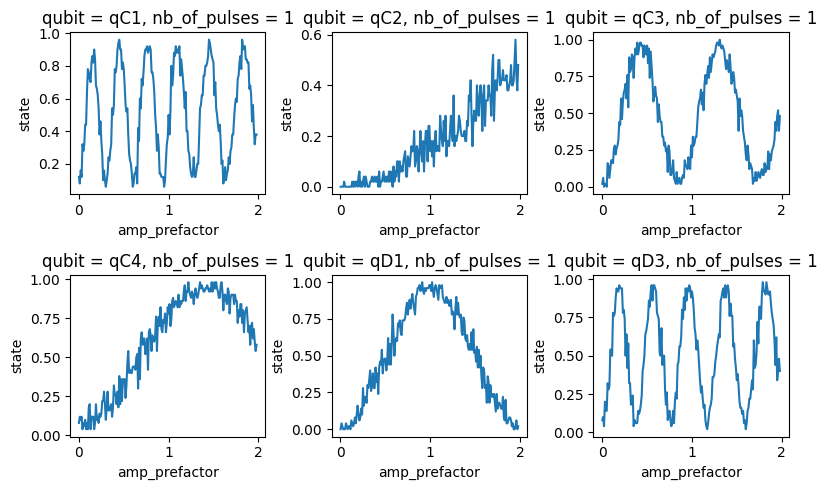

In [3]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(8, 5)
for i in range(6):
    ds_raw.sel(qubit=ds_raw.qubit.values[i]).state.plot(ax=ax[i//3,i%3])
plt.tight_layout()
plt.show()

## Fit the data using the current method

### Fit the raw data

In [4]:
fit_vals = fit_oscillation(ds_raw.state, "amp_prefactor")
print(fit_vals)

<xarray.DataArray (qubit: 6, nb_of_pulses: 1, fit_vals: 4)> Size: 192B
array([[[3.37393126e-02, 7.90945438e-01, 2.71893741e+00, 5.22390025e-01]],

       [[5.74050023e-01, 1.04350602e-01, 3.24845812e+00, 5.68040272e-01]],

       [[4.54960346e-01, 1.13654787e+00, 3.23295666e+00, 4.92427829e-01]],

       [[4.32003093e-01, 3.53964176e-01, 3.16623007e+00, 5.12048009e-01]],

       [[4.73734858e-01, 4.86981893e-01, 3.20173214e+00, 4.80611581e-01]],

       [[1.97397654e-13, 1.05862804e+00, 3.34994084e+00, 5.22612856e-01]]])
Coordinates:
  * qubit         (qubit) object 48B 'qC1' 'qC2' 'qC3' 'qC4' 'qD1' 'qD3'
  * nb_of_pulses  (nb_of_pulses) int32 4B 1
  * fit_vals      (fit_vals) <U6 96B 'a' 'f' 'phi' 'offset'


### Plot the fitted curve alongside the raw data

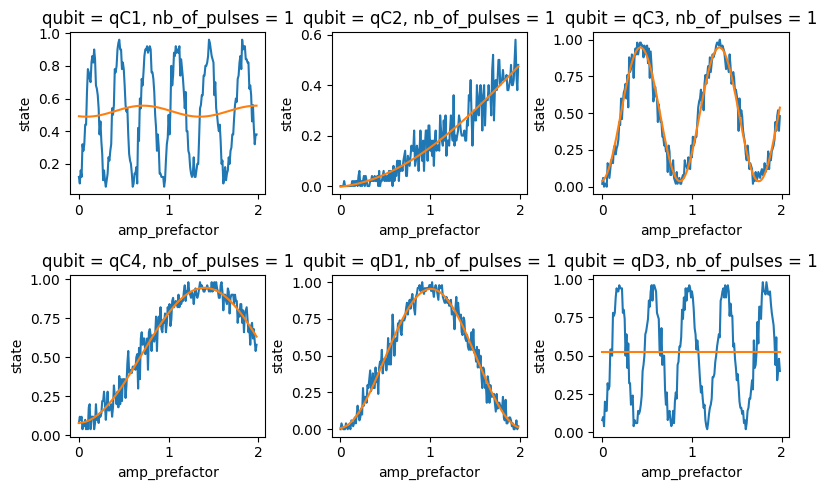

In [5]:
fig, ax = plt.subplots(2, 3)
fig.set_size_inches(8, 5)
for i in range(6):
    ds_raw.sel(qubit=ds_raw.qubit.values[i]).state.plot(ax=ax[i//3,i%3])
for i in range(6):
    fitted_data = oscillation(
    ds_raw.sel(qubit=ds_raw.qubit.values[i]).amp_prefactor.data,
    fit_vals.sel(qubit=ds_raw.qubit.values[i]).sel(fit_vals="a").data,
    fit_vals.sel(qubit=ds_raw.qubit.values[i]).sel(fit_vals="f").data,
    fit_vals.sel(qubit=ds_raw.qubit.values[i]).sel(fit_vals="phi").data,
    fit_vals.sel(qubit=ds_raw.qubit.values[i]).sel(fit_vals="offset").data,
    )
    ax[i//3,i%3].plot(ds_raw.sel(qubit=ds_raw.qubit.values[i]).amp_prefactor, fitted_data)
plt.tight_layout()
plt.show()